In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from sklearn.linear_model import LinearRegression
import itertools
import gc
import seaborn as snc
import os
import sys

In [ ]:
!wget https://www.dropbox.com/s/ncqb2ctkg7da11k/weather.csv.csv

In [ ]:
!wget https://www.dropbox.com/s/brixkogrmhan6ed/cab_rides.csv

In [4]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [ ]:
cab_data=pd.read_csv("cab_rides.csv")
weather_data=pd.read_csv("weather.csv.csv")
cab_data = reduce_mem_usage(cab_data)
weather_data=reduce_mem_usage(weather_data)

In [ ]:
weather_data.head()

In [ ]:
cab_data.columns

In [ ]:
weather_data.columns

In [11]:
cab_data['datetime']=pd.to_datetime(cab_data['time_stamp'])


In [12]:
weather_data['date_time']=pd.to_datetime(weather_data['time_stamp'])

In [13]:
cab_data.shape

(693071, 11)

In [ ]:
weather_data.describe()

In [15]:
a=pd.concat([cab_data,weather_data])

In [ ]:
a.head()

In [17]:
a['day']=a.date_time.dt.day
a['hour']=a.date_time.dt.hour

In [21]:
a.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind,date_time,day,hour
0,0.439941,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,1970-01-01 00:25:44.952607890,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
1,0.439941,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,1970-01-01 00:25:43.284023677,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
2,0.439941,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1970-01-01 00:25:43.366822198,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
3,0.439941,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.553582749,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
4,0.439941,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,1970-01-01 00:25:43.463360223,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0


In [19]:
a.fillna(0,inplace=True)

In [20]:
a.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'datetime', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind',
       'date_time', 'day', 'hour'],
      dtype='object')

In [22]:
a.groupby('cab_type').count()

,distance,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind,date_time,day,hour
cab_type,,,,,,,,,,,,,,,,,,,,
0,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276
Lyft,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408
Uber,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663


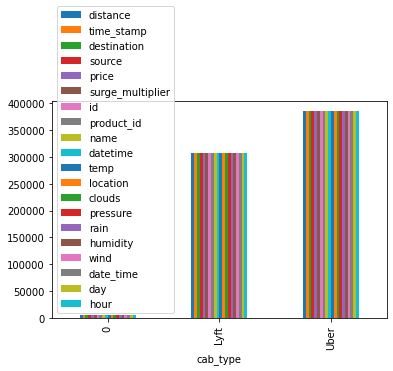

In [23]:
a.groupby('cab_type').count().plot.bar()

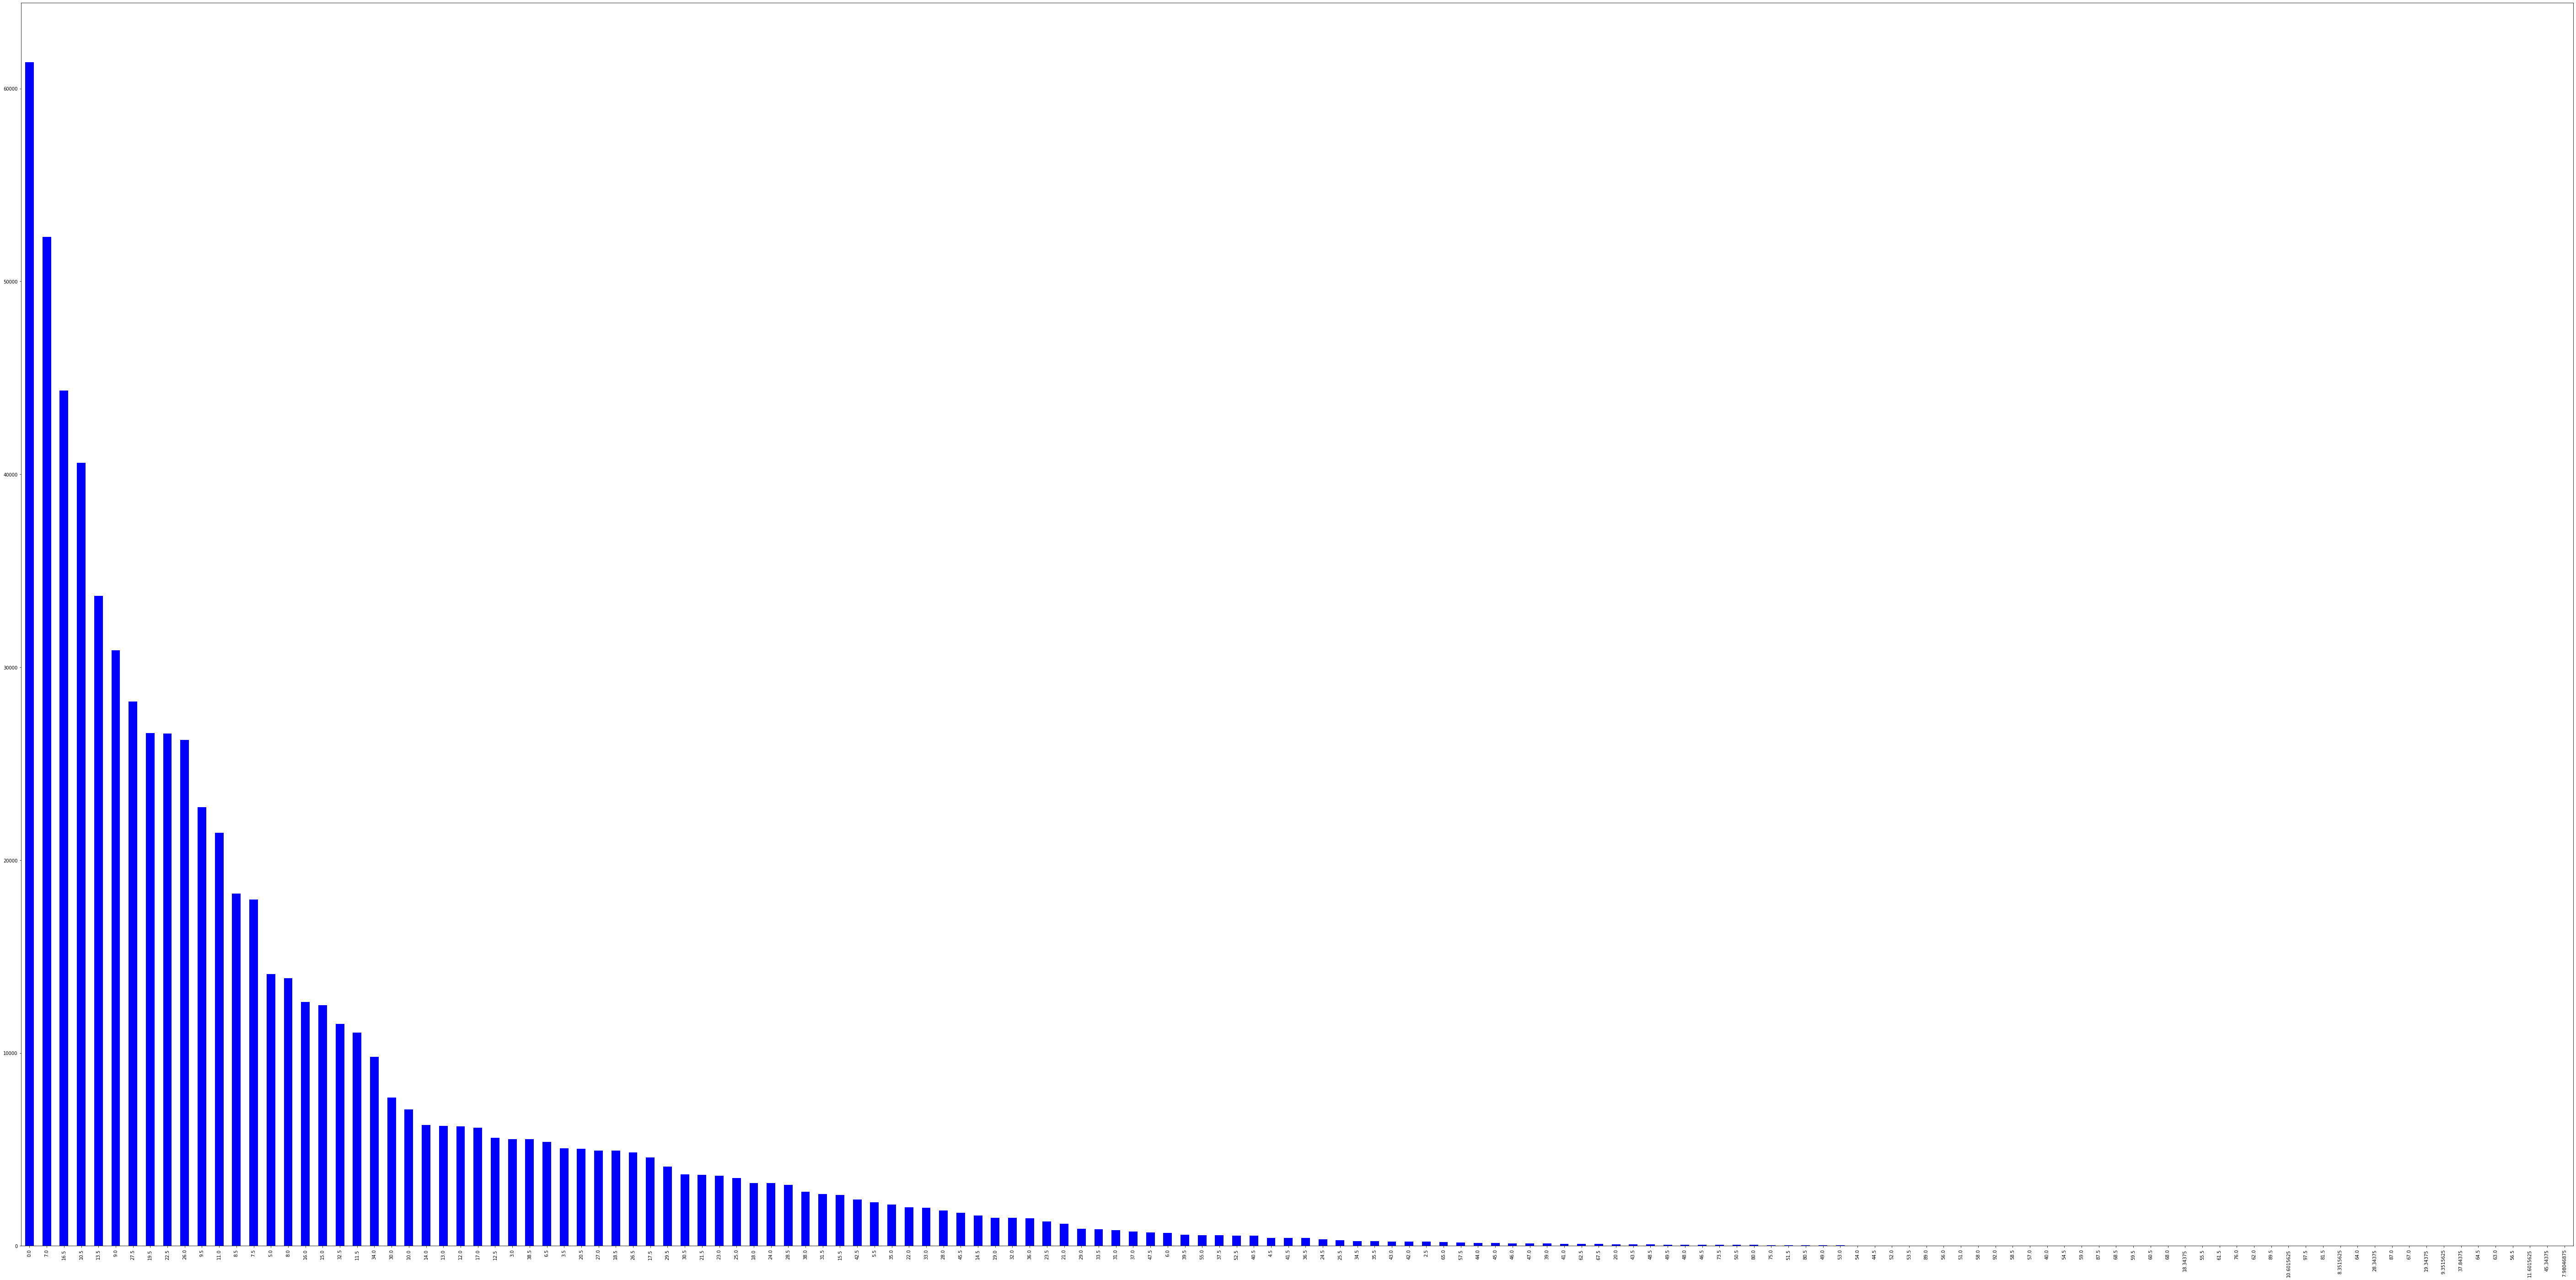

In [26]:
a['price'].value_counts().plot(kind='bar',figsize=(100,50),color='blue')

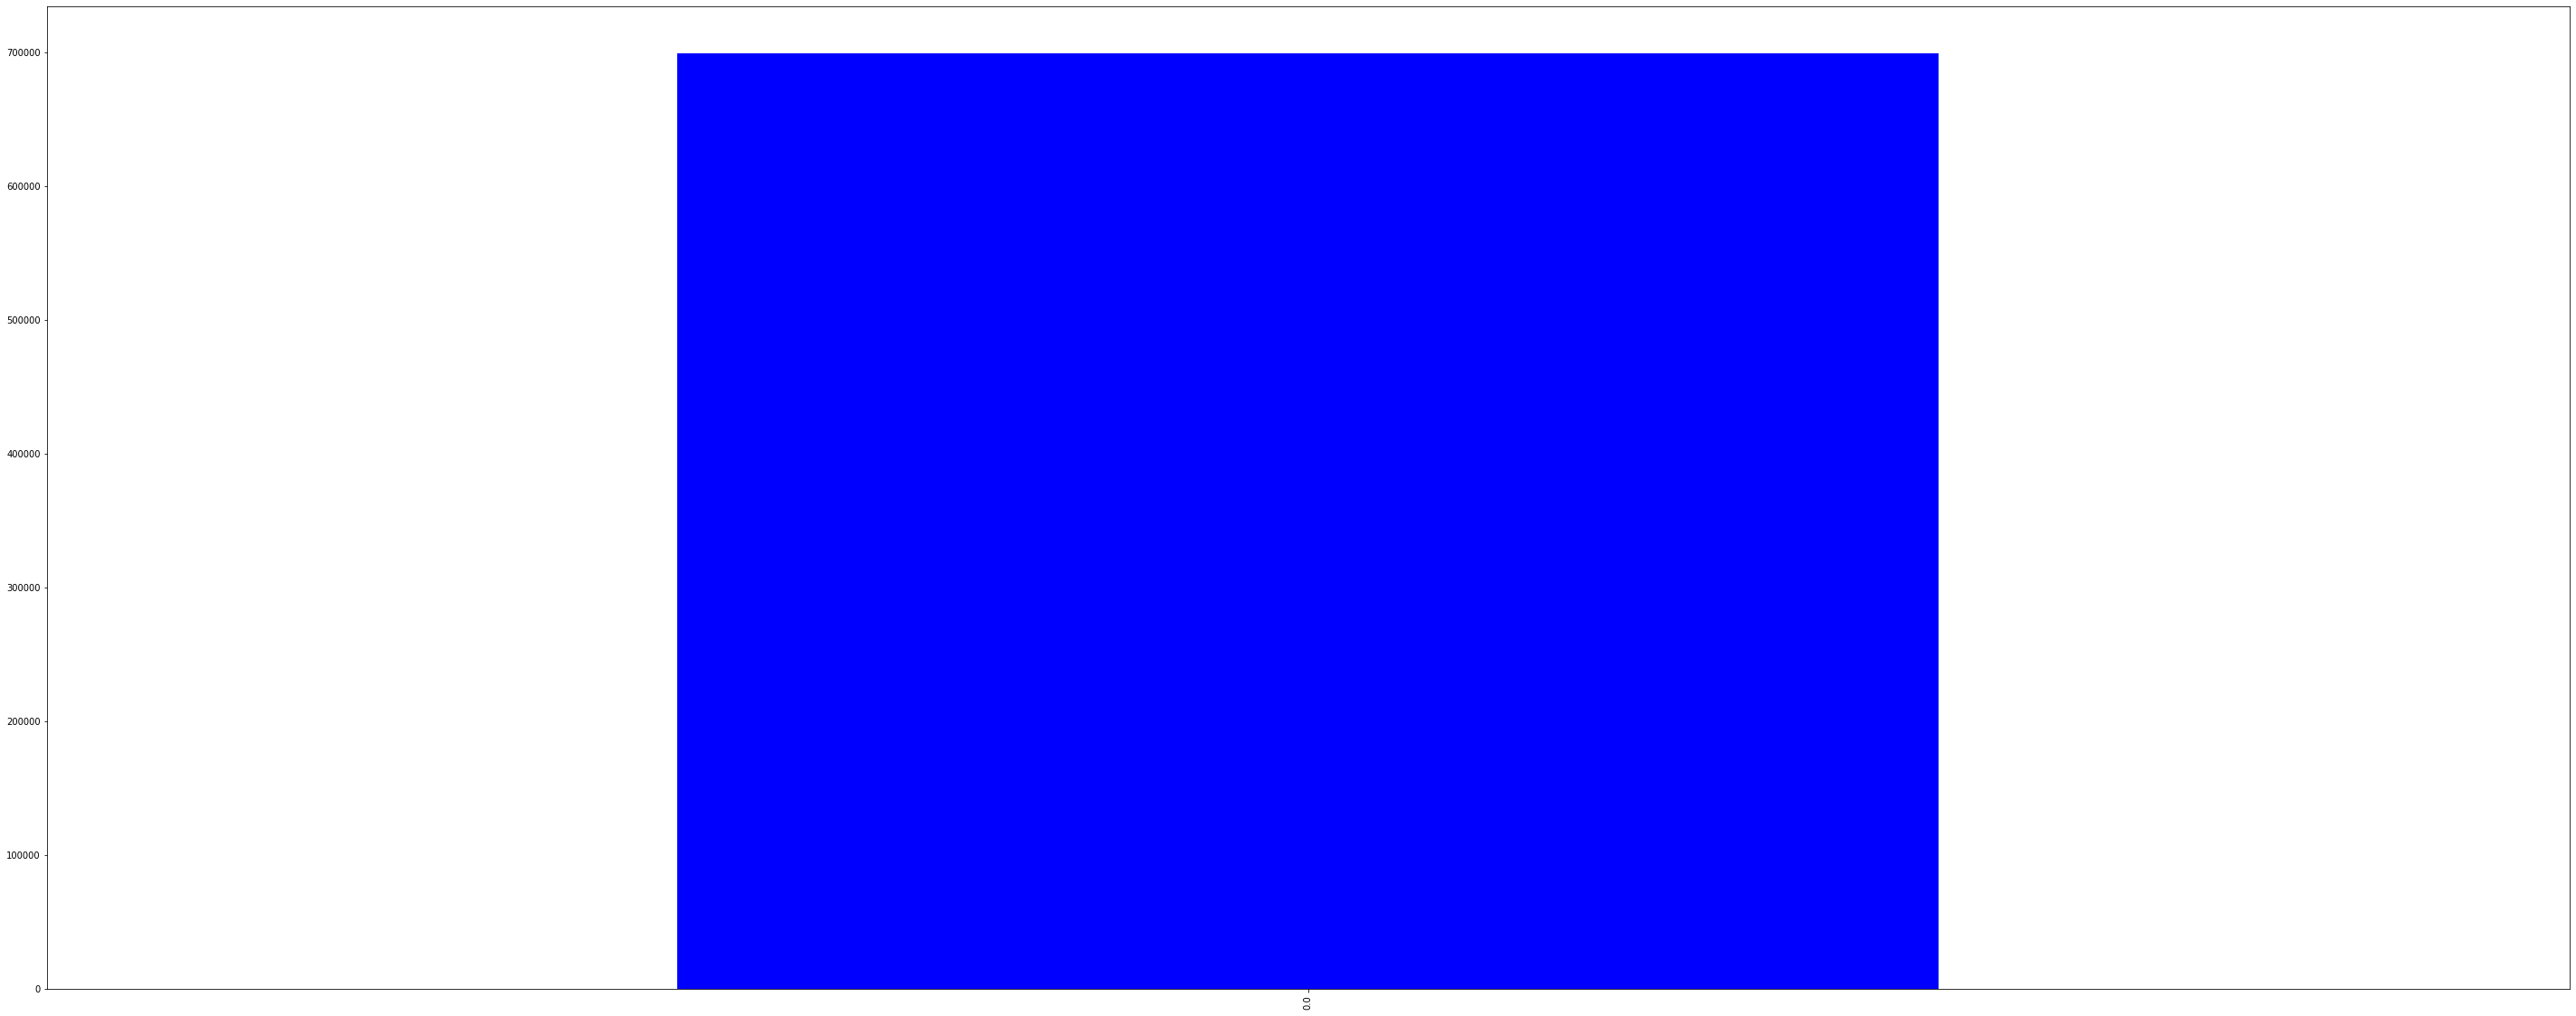

In [27]:
a['hour'].value_counts().plot(kind='bar',figsize=(50,20),color='blue')

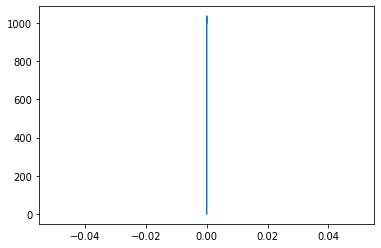

In [28]:
x=a['hour']
y=a['pressure']
plt.plot(x,y)
plt.show()

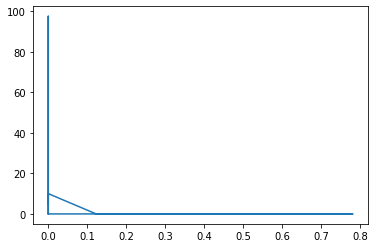

In [29]:
x=a['rain']
y=a['price']
plt.plot(x,y)
plt.show()

In [30]:
a.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'datetime', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind',
       'date_time', 'day', 'hour'],
      dtype='object')

In [32]:
x1=a[['distance','temp','pressure','humidity','wind','rain','day','hour','surge_multiplier','clouds']]
y1=a['price']

In [33]:
from sklearn.model_selection import train_test_split
x_train,y_train,x_test,y_test=train_test_split(x1,y1,test_size=0.25,random_state=45)

In [34]:
linear=LinearRegression()
linear.fit(x_train,x_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
predictions=linear.predict(y_train)
predictions

array([12.00170104, 17.72723406, 10.85285226, ..., 13.91769641,
       12.71770452, 15.58171842])

In [ ]:
df=pd.DataFrame({'Actual':y_test,'predicted':predictions})
df

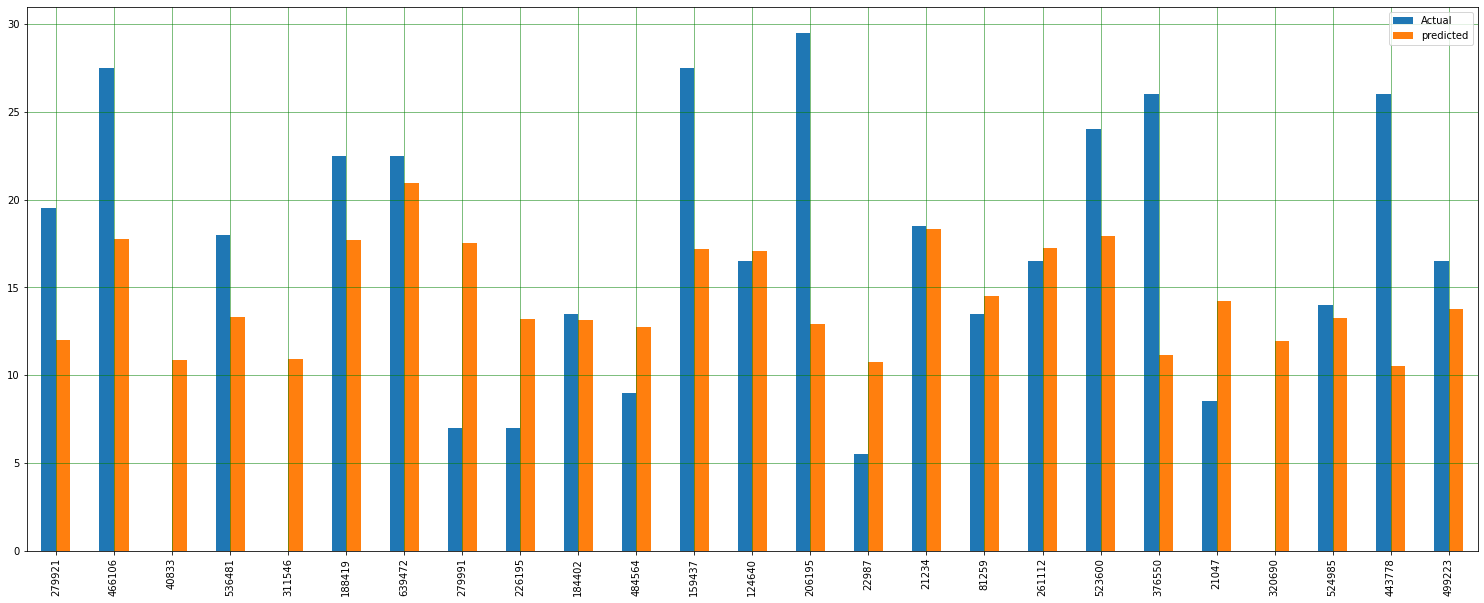

In [48]:
df1=df.head(25)
df1.plot(kind='bar',figsize=(26,10))
plt.grid(which="major", linestyle='-', linewidth='0.5', color='green')
plt.grid(which="minor", linestyle=':', linewidth='0.5', color='black')
plt.show()